In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import statsmodels as sm
import warnings
warnings.simplefilter(action='ignore')

In [2]:
data = pd.read_csv(r"C:\Users\Satish Patil\OneDrive\Desktop\BIA\Machine Learning\03-Logistic Regression & Classification Metrics\titanic.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
print('Percent of missing "Age" records is %.2f%%' %((data['Age'].isnull().sum()/data.shape[0])*100))

Percent of missing "Age" records is 19.87%


In [7]:
null_percentage_age = (data['Age'].isnull().sum() / len(data)) * 100
print(f"Percent of missing 'Age'records is: {null_percentage_age:.2f}%")

Percent of missing 'Age'records is: 19.87%


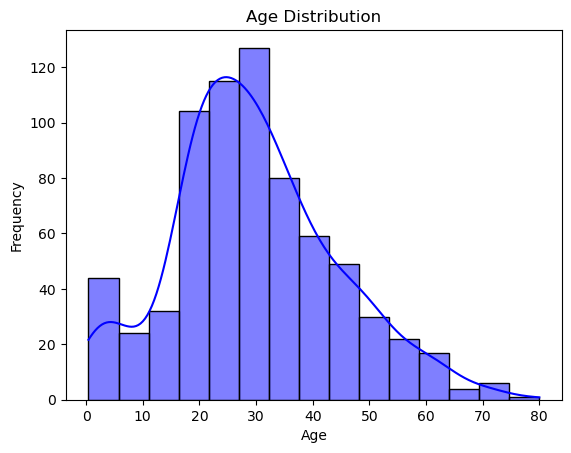

In [8]:
sns.histplot(data['Age'], bins=15, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

##### Since "Age" is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. To deal with this, we'll use the median to impute the missing values.

In [10]:
mean_age = data['Age'].mean()
median_age = data['Age'].median()

print(f"Mean of Age: {mean_age:.2f}")
print(f"Median of Age: {median_age}")

Mean of Age: 29.70
Median of Age: 28.0


In [11]:
null_percentage_cabin = (data['Cabin'].isnull().sum() / len(data)) * 100
print(f"Percent of missing 'Cabin'records is: {null_percentage_cabin:.2f}%")

Percent of missing 'Cabin'records is: 77.10%


##### 77% of records are missing, which means that imputing information and using this variable for prediction is probably not wise. We'll ignore this variable in our model.

In [13]:
null_percentage_Embarked = (data['Embarked'].isnull().sum() / len(data)) * 100
print(f"Percent of missing 'Cabin'records is: {null_percentage_Embarked:.2f}%")

Percent of missing 'Cabin'records is: 0.22%


##### There are only 2 (0.22%) missing values for "Embarked", so we can just impute with the port where most people boarded.

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


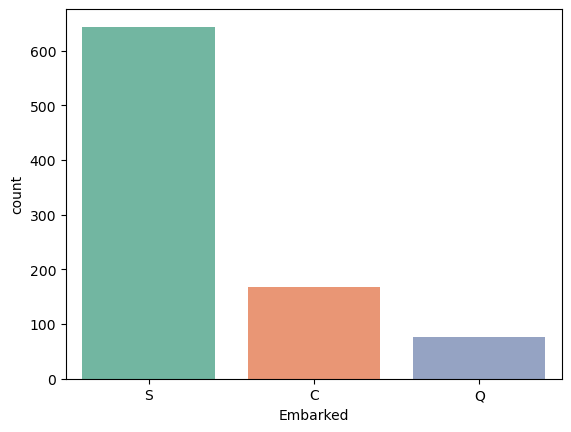

In [15]:
print(data['Embarked'].value_counts())
sns.countplot(x='Embarked', data=data, palette='Set2')
plt.show()

##### By far the most passengers boarded in 'S', so we'll impute those 2 NaN's w/ "S".

In [17]:
data["Age"].fillna(data["Age"].median(skipna=True), inplace=True)
data["Embarked"].fillna(data['Embarked'].value_counts().idxmax(), inplace=True)
data.drop('Cabin', axis=1, inplace=True)

In [18]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

In [20]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [21]:
df=data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=False)

In [22]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


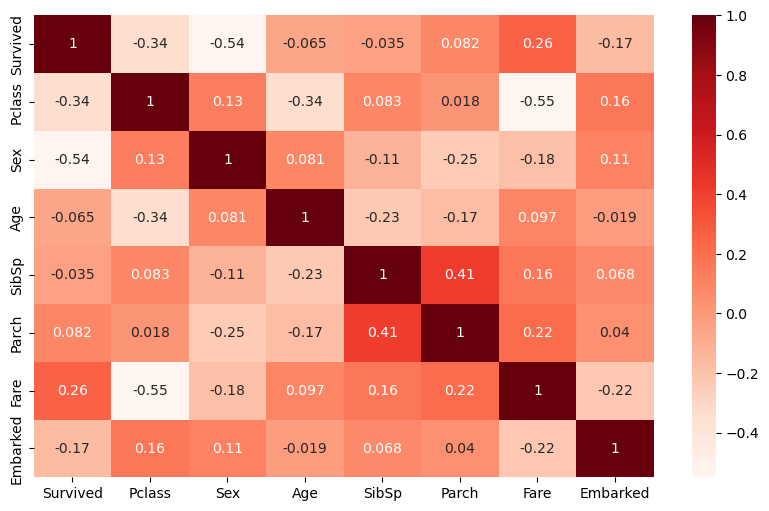

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True)
plt.show()

## EDA

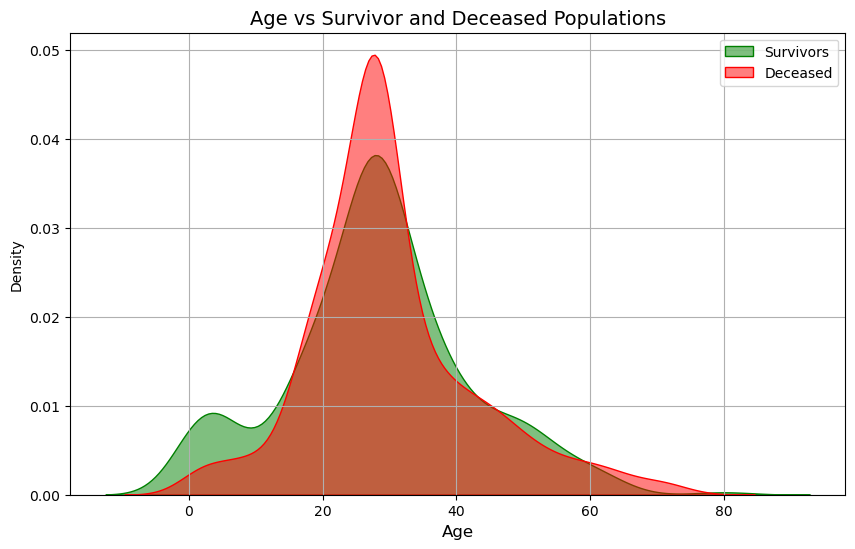

In [25]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Survived'] == 1]['Age'], label='Survivors', fill=True, color='green', alpha=0.5)
sns.kdeplot(df[df['Survived'] == 0]['Age'], label='Deceased', fill=True, color='red', alpha=0.5)

plt.title('Age vs Survivor and Deceased Populations', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

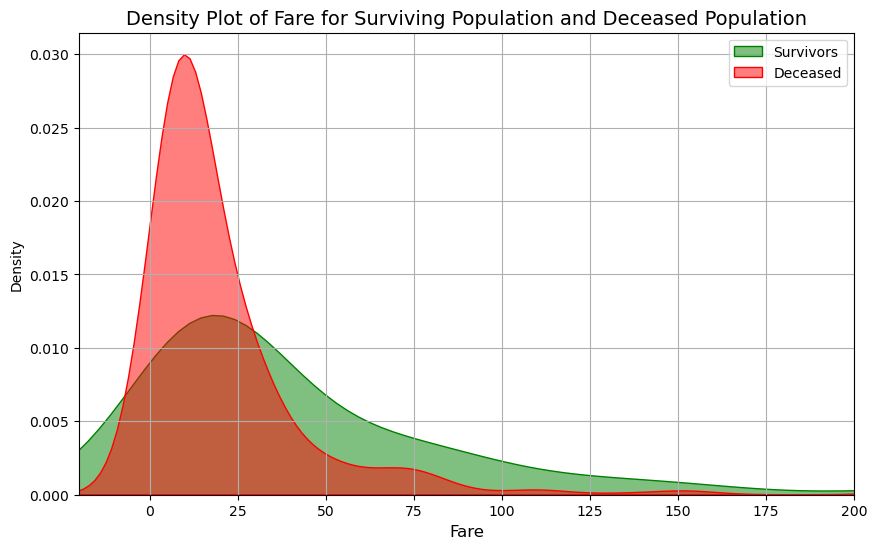

In [26]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Survived'] == 1]['Fare'], label='Survivors', fill=True, color='green', alpha=0.5)
sns.kdeplot(df[df['Survived'] == 0]['Fare'], label='Deceased', fill=True, color='red', alpha=0.5)

plt.title('Density Plot of Fare for Surviving Population and Deceased Population', fontsize=14)
plt.xlabel('Fare', fontsize=12)
plt.legend()
plt.grid(True)
plt.xlim(-20,200)
plt.show()

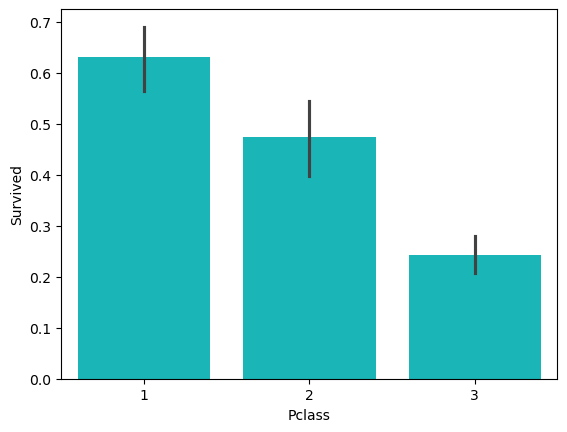

In [27]:
sns.barplot(x='Pclass', y='Survived', data=df, color="darkturquoise")
plt.show()

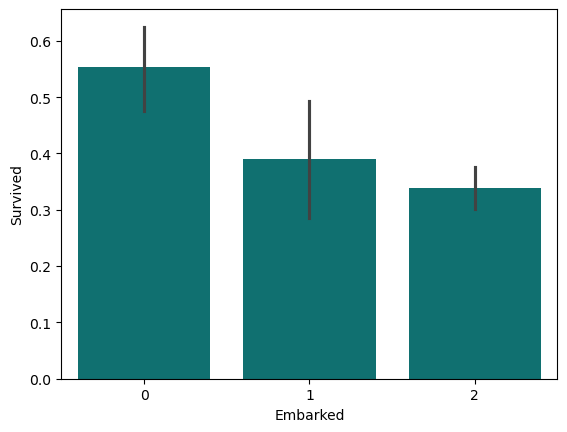

In [28]:
sns.barplot(x='Embarked', y='Survived', data=df, color="teal")
plt.show()

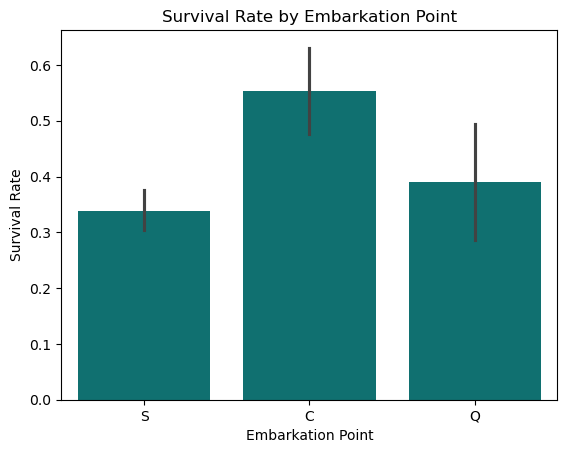

In [29]:
encoder = LabelEncoder()
encoder.fit(['C', 'Q', 'S'])  # Fit the encoder on original values
df['Embarked_Original'] = encoder.inverse_transform(df['Embarked'])

sns.barplot(x='Embarked_Original', y='Survived', data=df, color="teal")
plt.title('Survival Rate by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Survival Rate')
plt.show()

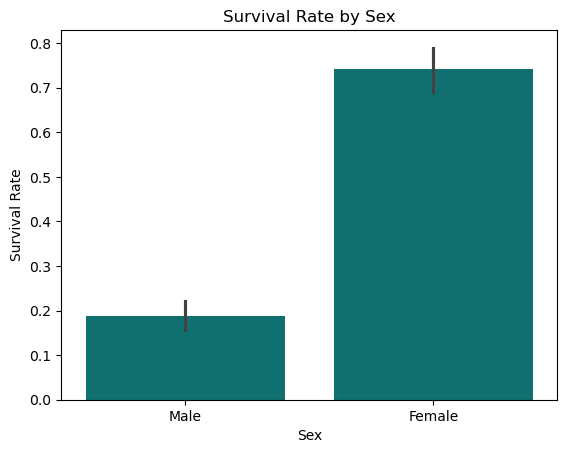

In [30]:
encoder = LabelEncoder()
encoder.fit(['Male', 'Female'])  # Fit the encoder on original values
df['Sex_Original'] = encoder.inverse_transform(df['Sex'])

sns.barplot(x='Sex_Original', y='Survived', data=df, color="teal")
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

In [31]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_Original,Sex_Original
0,0,3,1,22.0,1,0,7.2500,2,S,Male
1,1,1,0,38.0,1,0,71.2833,0,C,Female
2,1,3,0,26.0,0,0,7.9250,2,S,Female
3,1,1,0,35.0,1,0,53.1000,2,S,Female
4,0,3,1,35.0,0,0,8.0500,2,S,Male


In [32]:
new_data=df.drop(columns=['Embarked_Original', 'Sex_Original'], inplace=False)

In [33]:
new_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## Feature selection

#### Recursive feature elimination¶


##### Given an external estimator that assigns weights to features, recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.



In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ["Age","Fare","Pclass","Embarked","Sex","Parch", "SibSp"] 
X = new_data[cols]
y = new_data['Survived']
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes / 8 features from your input data X
rfe = RFE(estimator=model, n_features_to_select=6)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Age', 'Pclass', 'Embarked', 'Sex', 'Parch', 'SibSp']


### Feature ranking with recursive feature elimination and cross-validation

##### RFECV performs RFE in a cross-validation loop to find the optimal number or the best number of features. Hereafter a recursive feature elimination applied on logistic regression with automatic tuning of the number of features selected with cross-validation.

Optimal number of features: 7
Selected features: ['Age', 'Fare', 'Pclass', 'Embarked', 'Sex', 'Parch', 'SibSp']


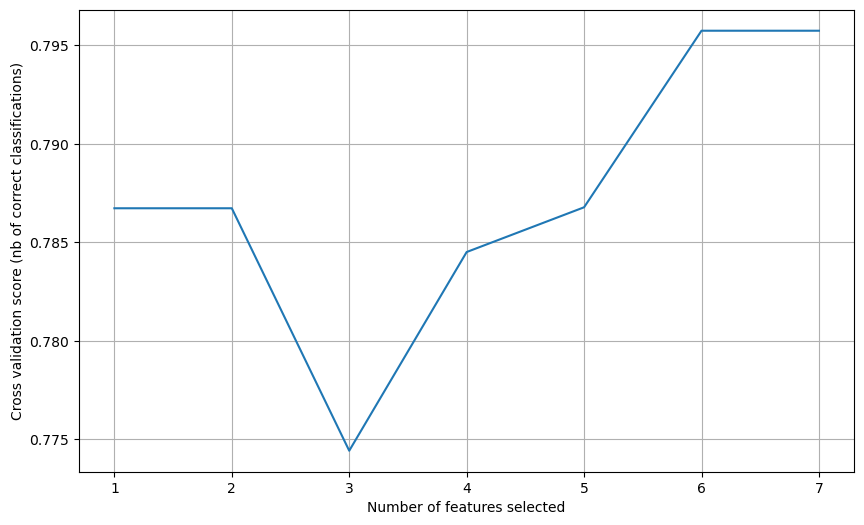

In [40]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.grid(True)
plt.show()

#### 
Cross-Validation:
Cross-validation splits the dataset into multiple folds to evaluate the model's performance on unseen data.
For example, with 10-fold cross-validation, the dataset is split into 10 parts, and the model is trained on 9 parts and tested on the 1 remaining part. This process repeats 10 times.

Cross-Validation Score:
The cross-validation score (cv_results_['mean_test_score']) represents the average accuracy across all folds for each number of features selected during the feature elimination process.

##### As we see, we can select 6-7 features.


## Logistic Regression

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  
from sklearn.model_selection import train_test_split, cross_val_score

In [44]:
X = new_data.drop('Survived', axis = 1)
y = new_data['Survived']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.preprocessing import StandardScaler        
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [48]:
y_pred = logreg.predict(X_test)

In [49]:
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print(f"Accuracy : {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8044692737430168
Accuracy : 0.80
Confusion Matrix:
[[90 15]
 [20 54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



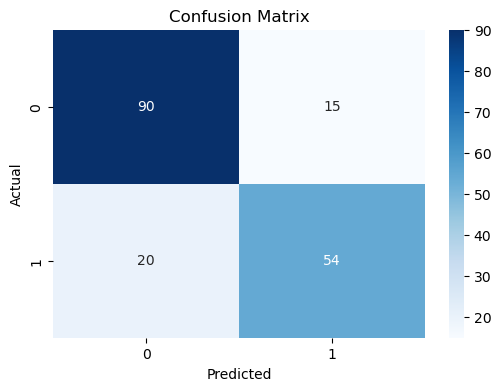

In [50]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Model evaluation based on K-fold cross-validation using cross_val_score() function

In [52]:
cv_score_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print(f"CV Score Accuracy : {cv_score_accuracy.mean():.2f}")

CV Score Accuracy : 0.80


#### Model evaluation based on K-fold cross-validation using cross_validate() function

In [54]:
from sklearn.model_selection import cross_validate
cross_validate_results = cross_validate(logreg, X, y, cv=10, scoring='accuracy',return_train_score=True)
cv_accuracies_train = cross_validate_results['train_score']
cv_accuracies_test = cross_validate_results['test_score']
mean_accuracy_train = np.mean(cv_accuracies_train)  
mean_accuracy_test = np.mean(cv_accuracies_test)  
print(f"CV Accuracy Train: {mean_accuracy_train:.2f}")
print(f"CV Accuracy Test: {mean_accuracy_test:.2f}")

CV Accuracy Train: 0.80
CV Accuracy Test: 0.80


### ROC-AUC Curve

In [56]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_prob = logreg.predict_proba(X_test)[:, 1]

In [57]:
# Get the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [58]:
# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.88


In [59]:
# Calculate AUC
roc_auc_manual = auc(fpr, tpr)
print(f"Manual Calculated AUC: {roc_auc_manual:.2f}")

Manual Calculated AUC: 0.88


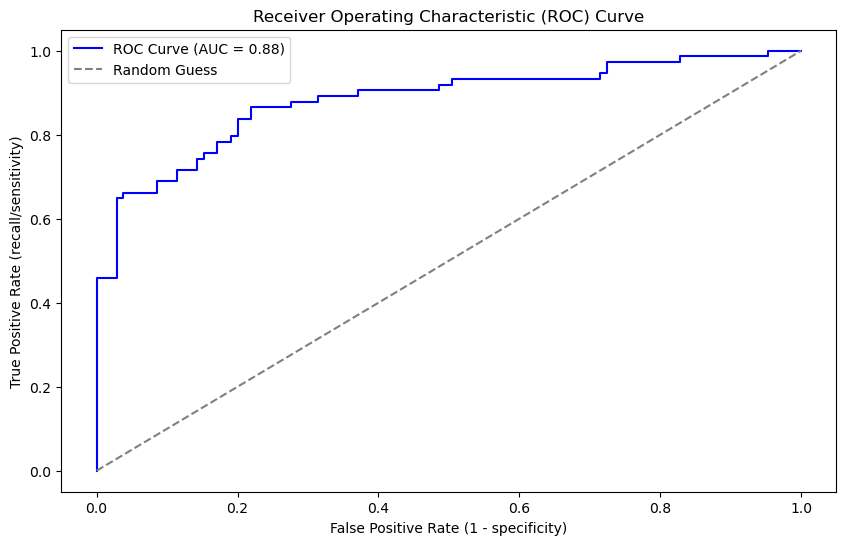

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")
plt.xlabel('False Positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate (recall/sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Simple Testing with Multiple Passengers:


In [62]:
new_data = pd.DataFrame({
    'Pclass': [3, 1, 2],
    'Sex': [1, 0, 1],  # female, male, female
    'Age': [22, 35, 28],
    'SibSp': [1, 0, 1],
    'Parch': [0, 1, 0],
    'Fare': [7.25, 50, 30],
    'Embarked': [2, 0, 1]  # S, C, Q
})

In [63]:
predictions = logreg.predict(new_data)

In [64]:
for idx, pred in enumerate(predictions):
    if pred == 1:
        print(f"Passenger {idx+1} survived!")
    else:
        print(f"Passenger {idx+1} did not survive.")

Passenger 1 did not survive.
Passenger 2 did not survive.
Passenger 3 did not survive.
